import essential libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import collections, re

In [2]:
df = pd.read_csv('globalenglish_essay_scoring.csv', encoding='latin1')

Visualize data

In [3]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


Lets see highest and lowest scoring essays: 

In [4]:
df['essay'][df['domain1_score'].idxmax()]

u' Bell rings.  Shuffle, shuffle. @CAPS1. Snap. EEEE. Crack. Slam. Click, stomp, @CAPS1. Tap tap tap. SLAM. Creak. Shoof, shoof.  Sigh. Seventh class of the day. Here we go. "@CAPS2! Tu va ou pas? On a +\xc2tude cette class-l+\x87. Tu peux aller au bibliotheque si tu veux...." @CAPS3 all blinked at me, @PERSON1, @NUM1le and @ORGANIZATION1, chocolate-haired and mocha skinned, impatiently awaiting my answer. The truth was, I knew @CAPS3 didn\'t really care if I came or not. It made no difference to them if I trailed a few feet behind like some pathetic puppy. I was silent but adorable, loved only because I was an @CAPS4. Because I spoke fidgety @CAPS5. Because I was the exchange student, because my translator and colorful clothes were so shocking for ten seconds, and were then forgotten about.  I was a flock of seagulls haircut. So why are you here? I thought. Why did you go on exchange at all? You are the complete opposite of everyone here. No one wants you. Just go home.  But my ego ha

In [5]:
df['essay'][df['domain1_score'].idxmin()]

u'The affects of the cyclist is if it does not change. it cut hurt a lot of people feeling because they @CAPS1 don\xd5t care about the cyclist. I\xd5m one of them people who does not care about it cause it does not affect me or anyone I know. It is a big deal to write people, some of them @CAPS1 blow stuff up. They talking on tiv and on the radio making all this stuff they say is made up. I don\xd5t believe to I see it. That @CAPS1 not for black people because it has not did anything to us. We really don\xd5t care about the affects of the cyclist.'

Now lets see some other statistics to better visualize data

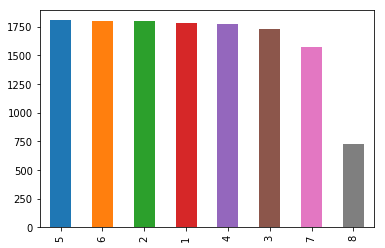

In [6]:
df['essay_set'].value_counts().plot(kind='bar')

In [7]:
df[['essay_set','rater1_domain1']].groupby(['essay_set']).agg(['mean', 'count','std'])

rater1_domain1                
                    mean count       std
essay_set                               
1               4.260796  1783  0.842119
2               3.415556  1800  0.774512
3               1.741020  1726  0.777672
4               1.319593  1771  0.880135
5               2.221053  1805  0.988515
6               2.561111  1800  0.979296
7               8.023582  1569  2.424120
8              18.338866   723  3.170147

In [8]:
df[['essay_set','rater2_domain1']].groupby(['essay_set']).agg(['mean', 'count','std'])

rater2_domain1                
                    mean count       std
essay_set                               
1               4.267527  1783  0.816287
2               3.436667  1800  0.775808
3               1.698725  1726  0.752710
4               1.315641  1771  0.877386
5               2.221607  1805  0.992030
6               2.550000  1800  0.977655
7               8.038878  1569  2.517367
8              18.557400   723  3.170669

In [9]:
df[['essay_set','domain1_score']].groupby(['essay_set']).agg(['mean', 'count','std'])

domain1_score                
                   mean count       std
essay_set                              
1              8.528323  1783  1.538565
2              3.415556  1800  0.774512
3              1.848204  1726  0.815157
4              1.431395  1771  0.940133
5              2.408864  1805  0.970821
6              2.720000  1800  0.970630
7             16.062460  1569  4.585350
8             36.950207   723  5.753502

In [10]:
df.isnull().any()

essay_id          False
essay_set         False
essay             False
rater1_domain1     True
rater2_domain1     True
domain1_score      True
dtype: bool

There are some essays without ratings. We will need to deal with these null values. 

In [11]:
df[df.isnull().any(axis=1)]

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
6973,10534,4,"When they come back, Saeng vowed silently to h...",NaN,NaN,NaN


Lets assign the record, average values from the set

In [12]:
df['rater1_domain1'][6973]  = 1.319593
df['rater2_domain1'][6973]  = 1.315641
df['domain1_score'][6973] = 1.431395

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
def lengthy_word_fraction(essay):
    essay_arr = essay.split()
    count = 0
    for word in essay_arr:
        if len(word) > 5:
            count += 1
    return float(count)/len(essay_arr)

In [14]:
df['lengthy_words'] = df['essay'].apply(lengthy_word_fraction,)

In [15]:
df[['lengthy_words','essay_set']].groupby(['essay_set']).agg(['mean', 'count','std'])

lengthy_words                
                   mean count       std
essay_set                              
1              0.290650  1783  0.050284
2              0.271738  1800  0.054125
3              0.277585  1726  0.061842
4              0.247933  1772  0.059821
5              0.294609  1805  0.058644
6              0.329938  1800  0.044434
7              0.216746  1569  0.062519
8              0.253171   723  0.049762

In [16]:
stop_words = (stopwords.words('english'))

In [17]:
def remove_stop_words(word_tokens,stop_words):
    tokenized = []
    word_tokens = word_tokens.split(' ')
    for w in word_tokens:
        if w not in stop_words:
            tokenized.append(w)
    return tokenized

In [18]:
df['tokenized_essay'] = df['essay'].apply(lambda x: remove_stop_words(x,stop_words),) 
df['tokenized_essay'] = df['tokenized_essay'].apply(lambda x: filter(None, x),)

We can see overall ratings co-relate to the length of an essay. Which is understandable. Lets try few other matrics 

In [19]:
def avg_word_length(essay):
    essay_arr = essay.split()
    length = 0
    for word in essay_arr:
        length += len(word)
    return float(length)/len(essay_arr)

In [20]:
df['Avg_word_len'] = df['essay'].apply(avg_word_length,)

In [21]:
df[['Avg_word_len','essay_set']].groupby(['essay_set']).agg(['mean', 'count','std'])

Avg_word_len                
                  mean count       std
essay_set                             
1             4.535796  1783  0.277839
2             4.445219  1800  0.402658
3             4.386474  1726  0.304810
4             4.376887  1772  0.291644
5             4.545174  1805  0.308523
6             4.811738  1800  0.237935
7             3.987283  1569  0.340152
8             4.240389   723  0.269269

Can't see obvious relationship between word length and scores. Since avg length of words is ~4.5, lets find out fraction of bigger words. 

In [22]:
df['word_count'] = df['tokenized_essay'].apply(len,)

In [23]:
df[['essay_set','word_count']].groupby(['essay_set']).agg(['mean', 'count','std'])

word_count                  
                 mean count         std
essay_set                              
1          204.989344  1783   69.612455
2          198.885556  1800   82.803740
3           61.048667  1726   31.031297
4           50.354966  1772   28.714130
5           67.017175  1805   32.934461
6           90.556111  1800   33.578447
7           96.267049  1569   51.798404
8          333.305671   723  117.446383

In [24]:
punctuation = string.punctuation

In [25]:
def get_punctuation_count(a,punctuation):
    count = 0
    for word in a.split():
        if word in punctuation:
            count += 1
    return float(count)

In [26]:
df['punctuation'] = df['essay'].apply(lambda x: get_punctuation_count(x,punctuation),)

In [27]:
df[['essay_set','punctuation']].groupby(['essay_set']).agg(['mean', 'count','std'])

punctuation                
                 mean count       std
essay_set                            
1            0.390914  1783  1.435585
2            0.225556  1800  1.908470
3            0.104287  1726  0.520439
4            0.133183  1772  0.619907
5            0.068698  1805  0.447636
6            0.041667  1800  0.317959
7            0.260038  1569  0.991000
8            0.434302   723  1.548670

In [28]:
def get_mentions(a):
    return filter(lambda x:x[0]=='@', a.split())

In [29]:
df['mentions'] = df['essay'].apply(get_mentions,)

In [30]:
df['mentions_count'] =  df['mentions'].apply(len)

In [31]:
df[['essay_set','mentions_count']].groupby(['essay_set']).agg(['mean', 'count','std'])

mentions_count                 
                    mean count        std
essay_set                                
1               9.269209  1783   9.355157
2               4.959444  1800   6.477654
3               0.483778  1726   0.949461
4               0.422686  1772   0.955949
5               2.110803  1805   2.714607
6               1.308889  1800   1.751400
7               6.790312  1569   8.539599
8              22.132780   723  21.561394

In [32]:
words = open("spell.words").readlines()
words = [word.strip() for word in words]

In [33]:
import enchant
d = enchant.Dict("en_US")

def spell_mistakes(a,words):
    bad_spell_counter = 0
    for word in a:
        if not d.check(word):
            bad_spell_counter += 1
    return float(bad_spell_counter)/len(a)

In [34]:
df['spell_mistakes'] =  df['tokenized_essay'].apply(lambda x: spell_mistakes(x,words),)  # this is very costly but i could not get library installed to check spellings.

In [36]:
df[['essay_set','spell_mistakes']].groupby(['essay_set']).agg(['mean', 'count','std'])

spell_mistakes                
                    mean count       std
essay_set                               
1               0.161657  1783  0.062755
2               0.154449  1800  0.060599
3               0.142698  1726  0.073877
4               0.143727  1772  0.084017
5               0.181996  1805  0.083662
6               0.114137  1800  0.058153
7               0.187970  1569  0.098845
8               0.152771   723  0.073539

In [38]:
df['essay_POS'] = df['essay'].apply(word_tokenize,)
df['essay_POS'] = df['essay_POS'].apply(nltk.pos_tag,)

In [39]:
def count_pos(a,mode):
    count = 0
    for tupl in a:
        if tupl[1] == mode:
            count += 1
    return float(count)/len(a)

df['count_adjectives']  = df['essay_POS'].apply(lambda x: count_pos(x,'JJ'),) 

In [40]:
df[['essay_set','count_adjectives']].groupby(['essay_set']).agg(['mean', 'count','std'])

count_adjectives                
                      mean count       std
essay_set                                 
1                 0.058218  1783  0.017120
2                 0.058336  1800  0.016614
3                 0.056929  1726  0.025708
4                 0.041413  1772  0.025222
5                 0.060630  1805  0.025516
6                 0.064926  1800  0.021890
7                 0.054654  1569  0.022116
8                 0.058682   723  0.013558

In [41]:
df['count_nouns']  = df['essay_POS'].apply(lambda x: count_pos(x,'NN'),) 

In [42]:
df['count_adverbs']  = df['essay_POS'].apply(lambda x: count_pos(x,'RB'),) 

In [43]:
df['num_sentences']  = df['essay'].apply(lambda x: len(x.split('.')),) #number of sentences in an essay

In [44]:
df[['essay_set','num_sentences']].groupby(['essay_set']).agg(['mean', 'count','std'])

num_sentences                 
                   mean count        std
essay_set                               
1             22.150308  1783   8.423809
2             20.622222  1800  17.193066
3              7.333140  1726   3.431436
4              5.723476  1772   3.080375
5              8.287535  1805   4.125241
6              9.531111  1800   3.839633
7             11.855959  1569   7.063914
8             34.975104   723  15.197570

In [45]:
df['bag_of_words'] = df['essay'].apply(lambda x: [ collections.Counter(re.findall(r'\w+', txt)) for txt in x.split(' ')],)

In [47]:
from nltk.stem import PorterStemmer

def stem_words(words):
    ps = PorterStemmer()
    essay = []
    for w in words:
        essay.append(ps.stem(w))
    return essay

In [48]:
df['tokenized_essay'] = df['tokenized_essay'].apply(stem_words,) 

In [49]:
df.to_csv('data_frame.csv', sep='\t', encoding='utf-8') # saved dataframe for other files.

In [55]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,lengthy_words,tokenized_essay,Avg_word_len,word_count,punctuation,mentions,mentions_count,spell_mistakes,essay_POS,count_adjectives,count_nouns,count_adverbs,num_sentences,bag_of_words
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,0.254438,"[dear, local, newspaper,, I, think, effect, co...",4.550296,181,1.0,"[@ORGANIZATION1,, @ORGANIZATION2,, @CAPS1,, @D...",5,0.232044,"[(Dear, NNP), (local, JJ), (newspaper, NN), (,...",0.051813,0.142487,0.054404,11,"[{u'Dear': 1}, {u'local': 1}, {u'newspaper': 1..."
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,0.269690,"[dear, @caps1, @caps2,, I, believ, use, comput...",4.463007,244,0.0,"[@CAPS1, @CAPS2,, @NUM1, @MONTH1, @LOCATION1.,...",10,0.139344,"[(Dear, NNP), (@, NNP), (CAPS1, NNP), (@, NNP)...",0.040948,0.118534,0.036638,19,"[{u'Dear': 1}, {u'CAPS1': 1}, {u'CAPS2': 1}, {..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,0.308244,"[dear,, @caps1, @caps2, @caps3, more, peopl, u...",4.526882,150,0.0,"[@CAPS1, @CAPS2, @CAPS3, @CAPS4,, @MONTH1, @CA...",7,0.106667,"[(Dear, NNP), (,, ,), (@, NNP), (CAPS1, NNP), ...",0.047923,0.124601,0.035144,15,"[{u'Dear': 1}, {u'CAPS1': 1}, {u'CAPS2': 1}, {..."
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0,0.383588,"[dear, local, newspaper,, @caps1, I, found, ma...",5.041985,317,0.0,"[@CAPS1, @PERCENT1, @CAPS2, @PERSON1, @PERSON2...",39,0.252366,"[(Dear, NNP), (Local, NNP), (Newspaper, NNP), ...",0.068740,0.119476,0.042553,25,"[{u'Dear': 1}, {u'Local': 1}, {u'Newspaper': 1..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0,0.288172,"[dear, @location1,, I, know, comput, posit, ef...",4.526882,254,0.0,"[@LOCATION1,, @NUM1, @LOCATION2, @CAPS1]",4,0.110236,"[(Dear, NNP), (@, NNP), (LOCATION1, NNP), (,, ...",0.044487,0.127660,0.065764,31,"[{u'Dear': 1}, {u'LOCATION1': 1}, {u'I': 1}, {..."


Lets explore co-relations between features and target

In [71]:
for i in range(1,9):
    print i,
    print np.corrcoef(df[(df.essay_set == i)]['rater1_domain1'], df[(df.essay_set == i)]['rater2_domain1'])[0,1]

1 0.7213267131944947
2 0.8144284805385914
3 0.7708155194901584
4 0.8511300153324303
5 0.7527010280573936
6 0.7765388466877469
7 0.7220063136152107
8 0.6306088057600142


Hence, grades differ a lot between two grades for some sets while for some essay sets like 4 they closely agree with each other